<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-up-the-Environment-and-Upload-data" data-toc-modified-id="Set-up-the-Environment-and-Upload-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set up the Environment and Upload data</a></span></li><li><span><a href="#Initial-Exploration-and-Pre-processing" data-toc-modified-id="Initial-Exploration-and-Pre-processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial Exploration and Pre-processing</a></span><ul class="toc-item"><li><span><a href="#DisGeNET-:-Gene-Disease-Association-(GDA)" data-toc-modified-id="DisGeNET-:-Gene-Disease-Association-(GDA)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DisGeNET : Gene Disease Association (GDA)</a></span></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data pre-processing</a></span></li><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Exploratory Analysis</a></span></li></ul></li><li><span><a href="#Bibliografia" data-toc-modified-id="Bibliografia-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bibliografia</a></span></li></ul></div>

In [1]:
#packages
import numpy as np
import pandas as pd
from tdc.multi_pred import GDA
from IPython.display import HTML

## Set up the Environment and Upload data

<div style="text-align: justify;">
To ensure that all the project's dependencies are installed correctly, we recommend using a Conda environment. You can easily create the environment with the project's dependencies from the env.yml file included in this repository.

In [2]:
# To use the DisGeNET dataset with TDC platform, we use the following code:
data = GDA(name='DisGeNET')

print("Data uploading completed :)")

Downloading...
100%|██████████| 63.9M/63.9M [00:03<00:00, 19.5MiB/s]
Loading...
Done!


Data uploading completed :)


## Initial Exploration and Pre-processing

<div style="text-align: justify;">
This section contains a comprehensive overview of the assigned data, starting with a detailed description and characterization based on existing documentation and literature. It includes a concise summary of the data's characteristics derived from an initial exploratory analysis, highlighting key statistics and observations. The section also describes the steps taken for data preparation and pre-processing, providing justification for each choice to ensure the data is clean, transformed, and organized for further analysis. Additionally, initial exploratory graphs are presented to visually illustrate the main characteristics of the data, helping to understand patterns, trends, and potential issues within the dataset.
 </div>

### DisGeNET : Gene Disease Association (GDA) 

In [3]:
HTML('<div style="display: flex; justify-content: center;"><img src="https://www.ensembl.info/wp-content/uploads/2021/04/disgenet-logo-horizontal.png" width="400"/></div>')

The study of **gene-disease associations is a crucial step in understanding the etiology of diseases**. Identifying the link between genes and diseases makes it possible to better understand the cause of the disease and therefore to develop strategies to combat it. This process is fundamental to the advancement of medicine and the development of new therapies. [1]

    

**Therapeutics Data Commons (TDC) is a database created to promote the discovery of therapies for diseases**, especially those that are difficult to treat. It was developed by the National Institutes of Health with the aim of gathering genomic and clinical data from various sources to support biomedical research and the development of new treatments. [2]


**GDA quantify the relation among a pair of gene-disease** and is one of the core concepts of DisGeNet platform that are integrated on TDC. DisGeNET is a discovery platform containing one of the largest publicly available collections of genes and variants associated to human diseases. **DisGeNET integrates data from expert curated repositories, Genome-Wide Association Study catalogues, animal models and the scientific literature**. DisGeNET data are homogeneously annotated with controlled vocabularies and community-driven ontologies. TDC uses the curated subset from UNIPROT, CGI, ClinGen, Genomics England, CTD (human subset), PsyGeNET, and Orphanet. TDC maps disease ID to disease definition through MedGen and maps GeneID to uniprot amino acid sequence. [3]


This dataset contains **52,476 gene-disease pairs:** 7,399 genes and 7,095 diseases.                                   
As we can see by de code bellow we have an object with 52,476 rows and 5 columns: *'Gene_ID'*, *'Gene'*, *'Disease_ID'*, *'Disease'*, *'Y'*. 

- **Gene_ID** column contains all unique identifiers for genes.
- **Gene** column contains the sequences of amino acides corresponding to each gene_ID through Uniprot platform.
- **Disease_ID** column contains all unique identifiers for diseases.
- **Disease** column contains the disease definition corresponding to each disease_ID through MedGen-NCBI platform.
- **Y** column is the target feature and represents the probability of association for a pair gene-disease. This column have values between 0 and 1.

As our taregt feature is a numeric one, our work will be a regression problem when the main task is: *Given the disease description and the amino acid sequence of the gene, predict their association*.

In [4]:
#Inspecting DisGeNet dataset
full_data = data.get_data()
full_data.info()
full_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52476 entries, 0 to 52475
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gene_ID     52476 non-null  int64  
 1   Gene        52476 non-null  object 
 2   Disease_ID  52476 non-null  object 
 3   Disease     52476 non-null  object 
 4   Y           52476 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.0+ MB


,Gene_ID,Gene,Disease_ID,Disease,Y
0,1,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,C0019209,Hepatomegaly: Abnormal enlargement of the liver.,0.30
1,1,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,C0036341,Schizophrenia: Schizophrenia is highly heritab...,0.30
2,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0002395,Alzheimer's Disease: Alzheimer disease is the ...,0.50
3,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0007102,Malignant tumor of colon: A primary or metasta...,0.31
4,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0009375,Colonic Neoplasms: A benign or malignant neopl...,0.30


### Data pre-processing
falta acrescentar um label encoding para as labels dos gráficos, acho que faz mais sentido incorporar no final antes de plotar os primeiros gráficos da análise exploratória

#### Inspeção dos Dados:  
Já sabemos que não há valores ausentes, então podemos avançar diretamente para a restante preparação dos dados. 

- Codificar Gene_ID e Disease_ID para valores numéricos usando LabelEncoder.
- Divisão em Conjuntos de Treino, Validação e Teste, confirmando que os dados já estão divididos corretamente nos conjuntos de treino, validação e teste.
- Preparação de Features e Target, selecionando as colunas Gene_ID_encoded, Disease_ID_encoded como features (X) e Y como o target.

In [5]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. Codificação de Gene_ID e Disease_ID
le_gene = LabelEncoder()
le_disease = LabelEncoder()

full_data['Gene_ID_encoded'] = le_gene.fit_transform(full_data['Gene_ID'])
full_data['Disease_ID_encoded'] = le_disease.fit_transform(full_data['Disease_ID'])

# 2. Normalização de Y
scaler = MinMaxScaler()
full_data['Y_normalized'] = scaler.fit_transform(full_data[['Y']])

# 3. Divisão do dataset em treino, validação e teste (80-10-10)
train_data, test_data = train_test_split(full_data, test_size=0.2, random_state=42)
train_data, valid_data = train_test_split(train_data, test_size=0.1, random_state=42)

# 4. Separação de Features (X) e Target (Y)
X_train = train_data[['Gene_ID_encoded', 'Disease_ID_encoded']]
y_train = train_data['Y_normalized']

X_valid = valid_data[['Gene_ID_encoded', 'Disease_ID_encoded']]
y_valid = valid_data['Y_normalized']

X_test = test_data[['Gene_ID_encoded', 'Disease_ID_encoded']]
y_test = test_data['Y_normalized']

# 5. Verificações básicas
print(f"Treino: {X_train.shape}, Validação: {X_valid.shape}, Teste: {X_test.shape}")
print("Primeiras linhas de X_train:")
print(X_train.head())




Treino: (37782, 2), Validação: (4198, 2), Teste: (10496, 2)
Primeiras linhas de X_train:
       Gene_ID_encoded  Disease_ID_encoded
24634             2182                6910
40534             4199                 415
8064               698                4606
29814             2749                4624
25108             2235                1254


#### Distribuições das Features
Gene_ID_encoded e Disease_ID_encoded devem apresentar padrões consistentes entre os conjuntos:

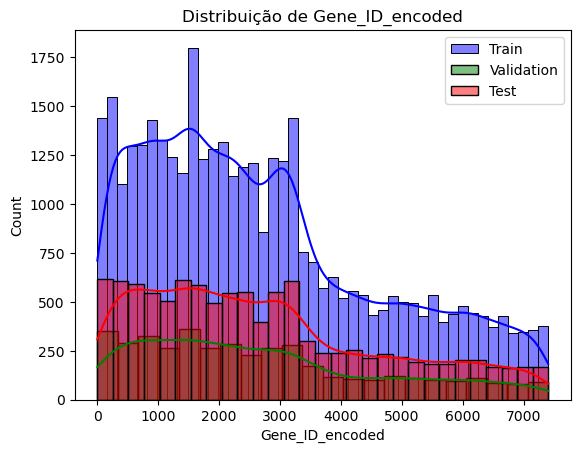

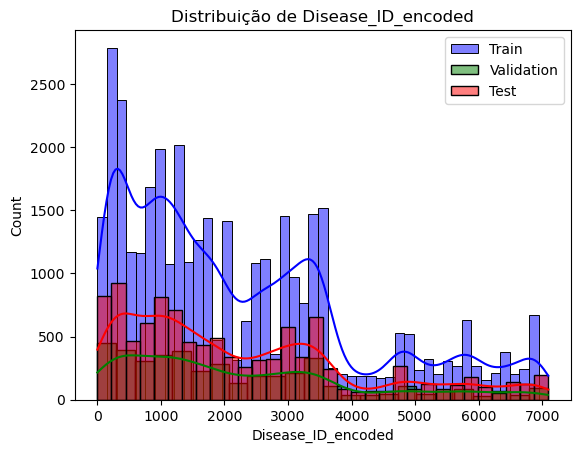

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuição de Gene_ID_encoded
sns.histplot(X_train['Gene_ID_encoded'], kde=True, color='blue', label='Train')
sns.histplot(X_valid['Gene_ID_encoded'], kde=True, color='green', label='Validation')
sns.histplot(X_test['Gene_ID_encoded'], kde=True, color='red', label='Test')
plt.title('Distribuição de Gene_ID_encoded')
plt.legend()
plt.show()

# Distribuição de Disease_ID_encoded
sns.histplot(X_train['Disease_ID_encoded'], kde=True, color='blue', label='Train')
sns.histplot(X_valid['Disease_ID_encoded'], kde=True, color='green', label='Validation')
sns.histplot(X_test['Disease_ID_encoded'], kde=True, color='red', label='Test')
plt.title('Distribuição de Disease_ID_encoded')
plt.legend()
plt.show()

#### Distribuição do Alvo (Y)

Deve ser similar entre treino, validação e teste, garantindo que o modelo será treinado e avaliado adequadamente:

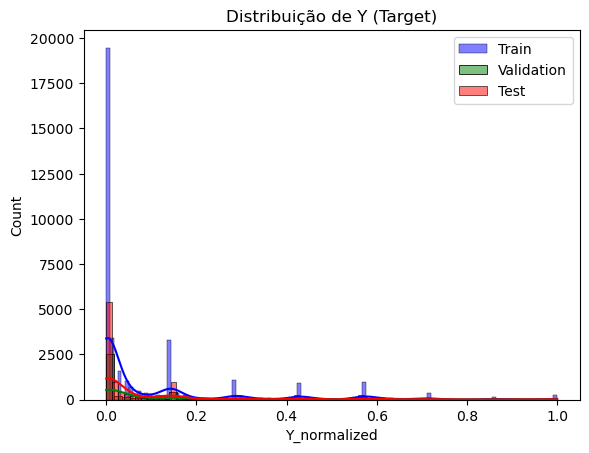

In [7]:
# Distribuição de Y
sns.histplot(y_train, kde=True, color='blue', label='Train')
sns.histplot(y_valid, kde=True, color='green', label='Validation')
sns.histplot(y_test, kde=True, color='red', label='Test')
plt.title('Distribuição de Y (Target)')
plt.legend()
plt.show()

### Exploratory Analysis

## Bibliografia

[1] Opap, K., & Mulder, N. (2017). Recent advances in predicting gene–disease associations. F1000Research, 6, 578. https://doi.org/10.12688/f1000research.10788.1
    
[2] Therapeutics Data Commons. (2024). TDC. https://tdcommons.ai/

[3] Piñero, J., Ramírez-Anguita, J. M., Saüch-Pitarch, J., Ronzano, F., Centeno, E., Sanz, F., & Furlong, L. I. (2019). The DisGeNET knowledge platform for disease genomics: 2019 update. Nucleic Acids Research, 48(D1). https://doi.org/10.1093/nar/gkz1021